# Example Map Plotting

In [1]:
# By line: RRB 2020-07-20
# Script aims to:
# - Load a netCDF file
# - Extract one variable: CO
# - Create contour plot as a world map with coastlines
# - Add axes labels
# - Add grid lines

### At the start of a Jupyter notebook you need to import all modules that you will use.

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                 # For plotting maps
import cartopy.feature as cfeature         # For plotting maps
from pathlib import Path                   # System agnostic paths
import xarray as xr                        # For loading the data arrays

### Define the directories and file of interest for your results.

In [6]:
result_dir = Path("/home/buchholz/Documents/code_database/untracked/my-notebook/CAM_Chem_examples")
file = "CAM_chem_merra2_FCSD_1deg_QFED_monthoutput_CO_201801.nc"
file_to_open = result_dir / file
#the netcdf file is now held in an xarray dataset named 'nc_load' and can be referenced later in the notebook
nc_load = xr.open_dataset(file_to_open)
#to see what the netCDF file contains, call the file read variable
nc_load

<xarray.Dataset>
Dimensions:    (ilev: 57, lat: 192, lev: 56, lon: 288, nbnd: 2, time: 1)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev        (lev) float64 1.868 2.353 2.948 3.677 ... 947.5 962.5 977.5 992.5
  * ilev       (ilev) float64 1.651 2.085 2.62 3.276 ... 955.0 970.0 985.0 1e+03
  * time       (time) datetime64[ns] 2018-02-01
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 ...
    hybm       (lev) float64 ...
    P0         float64 ...
    hyai       (ilev) float64 ...
    hybi       (ilev) float64 ...
    date       (time) int32 ...
    datesec    (time) int32 ...
    time_bnds  (time, nbnd) datetime64[ns] ...
    CO         (time, lev, lat, lon) float32 ...
    PDELDRY    (time, lev, lat, lon) float32 ...
    PS         (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              fmerra.2.1003.FCSD.f09.qfedcmip.56L.001.branch02
    logname:           buchholz
    host:              cheyenne6
    initial_file:      /glade/p/cesmdata/cseg/inputdata/atm/cam/inic/fv/f.e20...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0....
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Thu Jul  9 13:07:01 2020: ncrcat -O -v date,datesec,ti...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

### Extract the variable of choice at the time and level of choice

In [4]:
#extract variable
var_sel = nc_load['CO']
#to see the dimensions and metadata of the variable, uncomment below
#print(var_sel)

#select the surface level and convert to ppbv from vmr
var_srf = var_sel.isel(time=0,lev=55)
var_srf = var_srf*1e09 # 10-9 to ppb
print(var_srf.shape)

#extract grid variables
lat = var_sel.coords['lat']
lon = var_sel.coords['lon']

(192, 288)


### Plot the value over a specific region

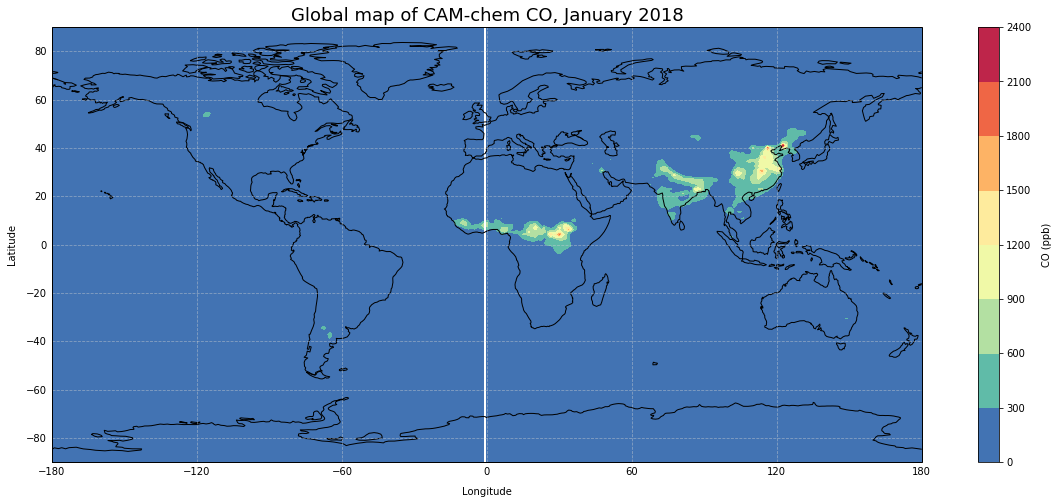

In [5]:
plt.figure(figsize=(20,8))

#Define projection
ax = plt.axes(projection=ccrs.PlateCarree())

#plot the data
plt.contourf(lon,lat,var_srf,cmap='Spectral_r')

# add coastlines
ax.add_feature(cfeature.COASTLINE)

#add lat lon grids
gl = ax.gridlines(draw_labels=True, color='lightgrey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# Titles
# Main
plt.title("Global map of CAM-chem CO, January 2018",fontsize=18)

# y-axis
ax.text(-0.04, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
# x-axis
ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
# legend
ax.text(1.15, 0.5, 'CO (ppb)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

plt.colorbar()
plt.show() 